In [ ]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from sklearn import tree


In [ ]:
#declaring the constants 
DATADIR = '/content/drive/MyDrive/ML LAB/dataset'
CATEGORIES = ['3_retina_disease','2_glaucoma','2_cataract','1_normal']
IMG_SIZE=255



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


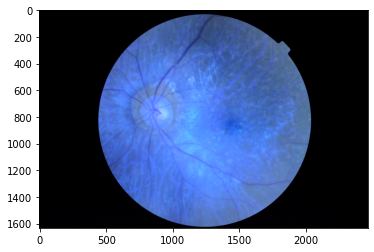

In [ ]:
#mounting the google drive into the notebook
from google.colab import drive
drive.mount('/content/drive')

#vizualizing the dataset
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break


In [ ]:
#creating the dataset 
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [ ]:
#independent and dependent variables defined
X=[]
y=[]
image_len = len(training_data)
for categories, label in training_data:
    X.append(categories)
    y.append(label)

#creating feature array
X= np.array(X).reshape(image_len,-1)

X = X/255.0

#creating class array 
y=np.array(y)

In [ ]:
#splitting the model into test and train 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
#PCA analysis on the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=2,)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
from sklearn.svm import SVC
#svc = SVC(decision_function_shape='ovo')
#svc.fit(X_train, y_train)



In [ ]:
#classifying using random forest model 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 


#rf_clf = RandomForestClassifier(max_depth =3)
#rf_clf.fit(X_train, y_train)

dt_clf = DecisionTreeClassifier(max_depth =3)
dt_clf.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=3)

In [ ]:
#predicting the values 
y_pred = dt_clf.predict(X_test)

#caauracy score calculation
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y_pred))

Accuracy on unknown data is 0.4503311258278146
